In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


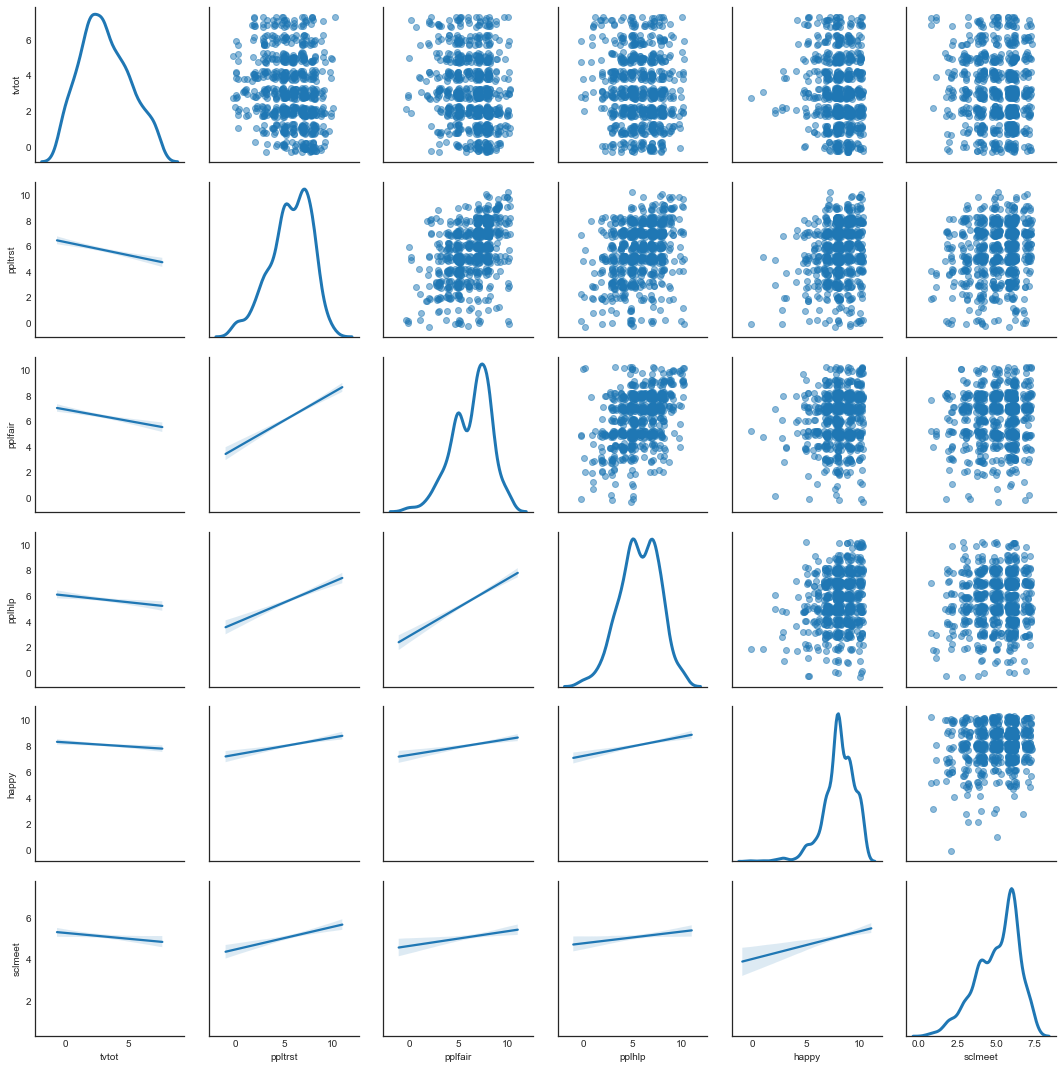

In [3]:
# Make the scatterplot matrix
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


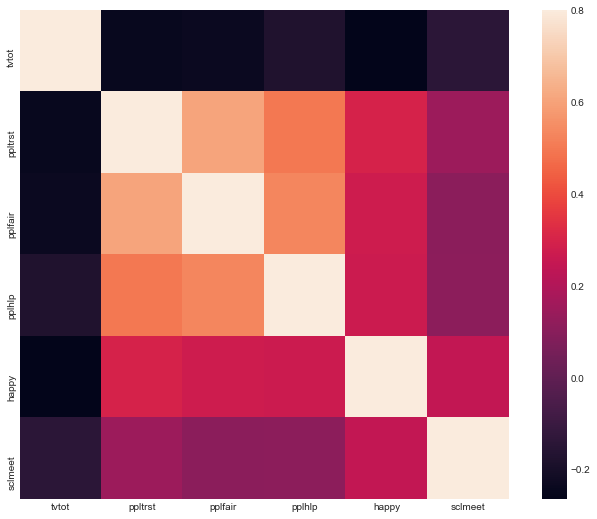

In [4]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.
